<a href="https://colab.research.google.com/github/nromano2/CS430_InClassAssignments/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
#Imports for data handling
import pandas as pd
import numpy as np

#Imports for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Imports for data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

#Imports for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load a dataset
car = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
# Check data
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?
---
**Dataset shape:**
- 11914 rows, 16 columns   

**Column Names - *Variable it represents - datatype***
- Make - make of car - dtype: object
- Model - model of car - dtype: object
- Year - year the car was manufactured - dtype: int64
- Engine Fuel Type - the fuel type of the vehicle - dtype: object
- Engine HP - the horsepower of the engine - dtype: float64
- Engine Cylinders - the number of cylinders in the engine - dtype: float64
- Transmission Type - the type of transmission - dtype: object
- Driven_Wheels - drive capability of the car (ex. front/rear/all/four rear drive) - dtype: object
- Number of Doors - number of wheels on the car - dtype: int64
- Market Category - market characteristic the car falls into (ex. exotic, luxury, etc.) - dtype: object
- Vehicle Size - Size of car (Compact/midsize/large) - dtype: object
- Vehicle Style - Style of car (sedan, suv, coupe, etc.) - dtype: object
- highway MPG - miles per gallon during highway driving - dtype: int64
- city mpg - miles per gallon during city driving - dtype: int64
- Popularity - popularity of car - dtype: int64
- MSRP - price - dtype: int64

In [ ]:
#Dataset Shape
car.shape

(11914, 16)

In [ ]:
#Column Name
car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#Datatypes
car.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?
---
The columns: Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors, and Market Category have missing values.

                    Make Missing Values:    0   
                   Model Missing Values:    0   
                    Year Missing Values:    0
        Engine Fuel Type Missing Values:    3
               Engine HP Missing Values:   69
        Engine Cylinders Missing Values:   30
       Transmission Type Missing Values:    0
           Driven_Wheels Missing Values:    0
         Number of Doors Missing Values:    6
         Market Category Missing Values: 3742
            Vehicle Size Missing Values:    0
           Vehicle Style Missing Values:    0
             highway MPG Missing Values:    0
                city mpg Missing Values:    0
              Popularity Missing Values:    0
                    MSRP Missing Values:    0

In [ ]:
def haveMissingVales(colname):
  missingValues = car[colname].isnull().sum()
  return f"{colname : >17} Missing Values: {missingValues : >4}"

In [ ]:
for colName in car.columns:
  print(haveMissingVales(colName))

             Make Missing Values:    0
            Model Missing Values:    0
             Year Missing Values:    0
 Engine Fuel Type Missing Values:    3
        Engine HP Missing Values:   69
 Engine Cylinders Missing Values:   30
Transmission Type Missing Values:    0
    Driven_Wheels Missing Values:    0
  Number of Doors Missing Values:    6
  Market Category Missing Values: 3742
     Vehicle Size Missing Values:    0
    Vehicle Style Missing Values:    0
      highway MPG Missing Values:    0
         city mpg Missing Values:    0
       Popularity Missing Values:    0
             MSRP Missing Values:    0


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?
---


In [ ]:
numerical = car.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

- The target varibale (**MSRP**) is heavily skewed to the right as depicted by the histogram below

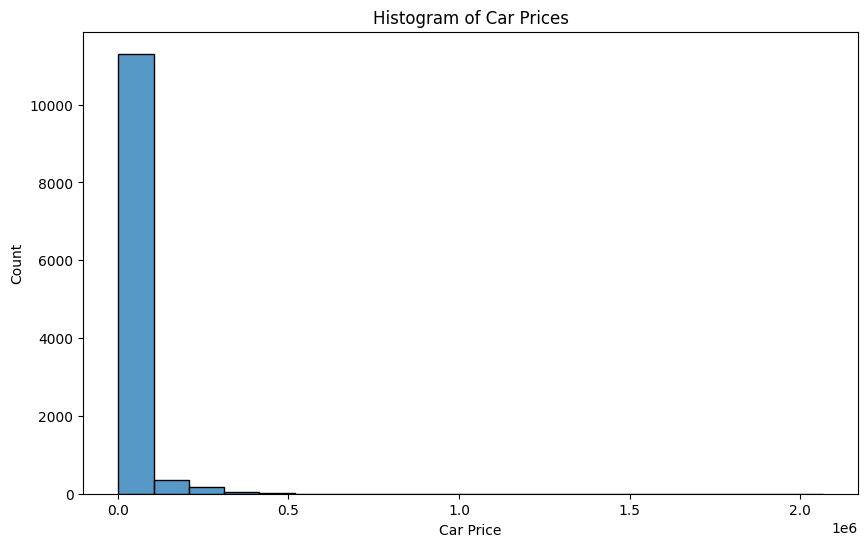

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(car['MSRP'], bins=20)
plt.title('Histogram of Car Prices')
plt.xlabel('Car Price')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?
- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?
---
- Highly correlated variables include:  
  - Engine HP and Engine Cylinders - [Positively Correlated]
  - Engine HP and MSRP - [Positively Correlated]
  - Engine Cylinders and MSRP - [Positively Correlated]
  - Highway MPG and City MPD - [Positively Correlated]
  - Engine Cylinders and Highway MPG - [Negatively Correlated]
  - Engine Cylinder and City MPG - [Negatively Correlated]
  - Engine HP and Highway MPG - [Negatively Correlated]
  - Engine HP and City MPG - [Negatively Correlated]
  


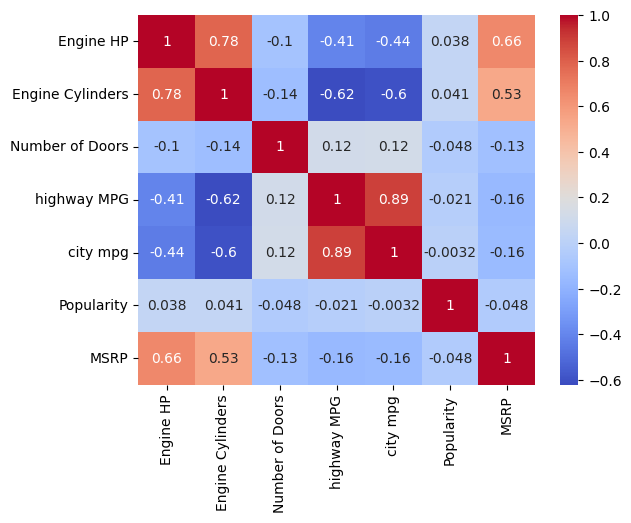

In [ ]:
sns.heatmap(numerical.corr(), annot=True, cmap = "coolwarm")
plt.show()

---
### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

---
The variables:
- Engine HP
- Engine Cylinders
- Highway MPG
- City MPG
- Popularity
- and MSRP

have outliers. These outliers for the input variables will be dealt by scaling the values using StandardScalar() in the preprocessing pipelines that will be built before creating the models. The outlire target variable (**MSRP**) values also be dealt using StandardScalar().

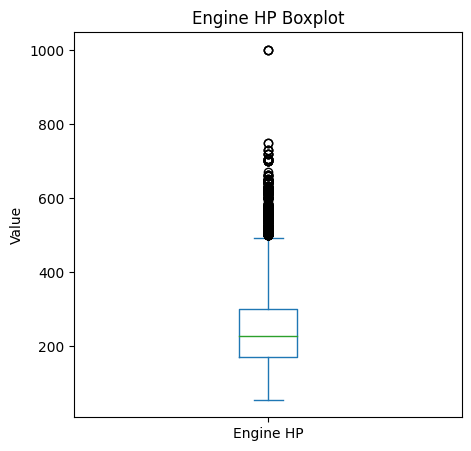

In [ ]:
figure = plt.figure(figsize=(5,5))
car['Engine HP'].plot(kind='box')
plt.title('Engine HP Boxplot')
plt.ylabel('Value')
plt.show()

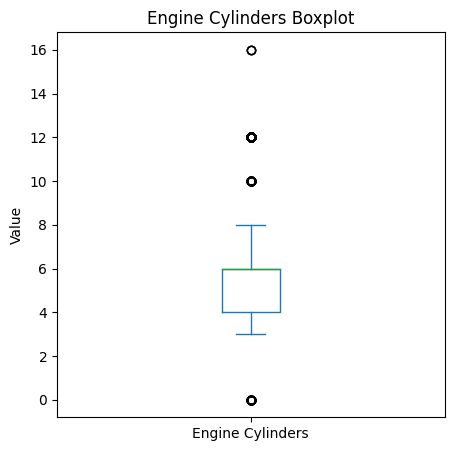

In [ ]:
figure = plt.figure(figsize=(5,5))
car['Engine Cylinders'].plot(kind='box')
plt.title('Engine Cylinders Boxplot')
plt.ylabel('Value')
plt.show()

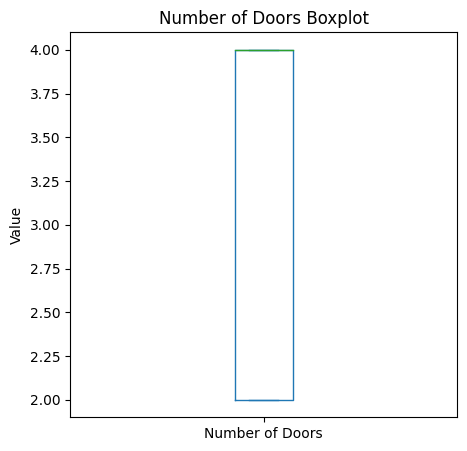

In [ ]:
figure = plt.figure(figsize=(5,5))
car['Number of Doors'].plot(kind='box')
plt.title('Number of Doors Boxplot')
plt.ylabel('Value')
plt.show()

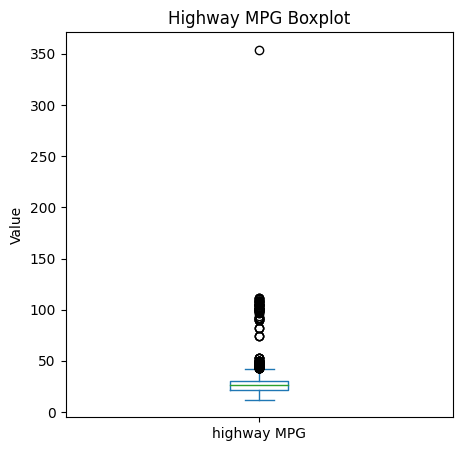

In [ ]:
figure = plt.figure(figsize=(5,5))
car['highway MPG'].plot(kind='box')
plt.title('Highway MPG Boxplot')
plt.ylabel('Value')
plt.show()

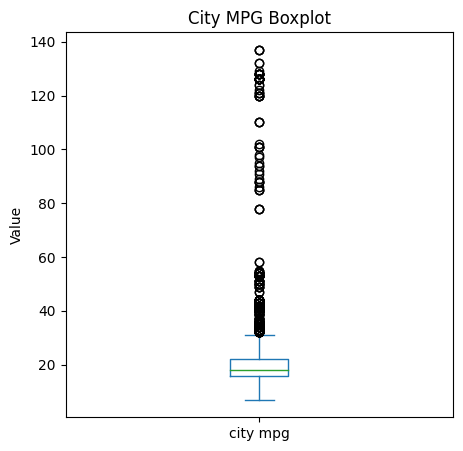

In [ ]:
figure = plt.figure(figsize=(5,5))
car['city mpg'].plot(kind='box')
plt.title('City MPG Boxplot')
plt.ylabel('Value')
plt.show()

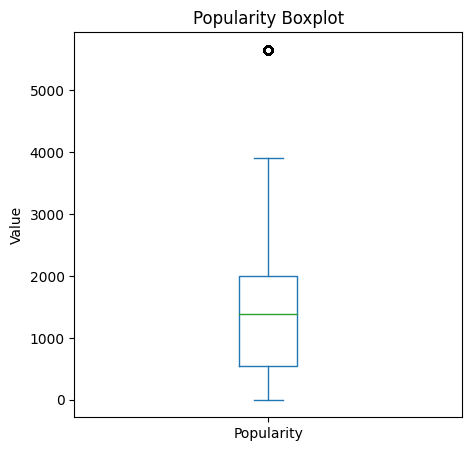

In [ ]:
figure = plt.figure(figsize=(5,5))
car['Popularity'].plot(kind='box')
plt.title('Popularity Boxplot')
plt.ylabel('Value')
plt.show()

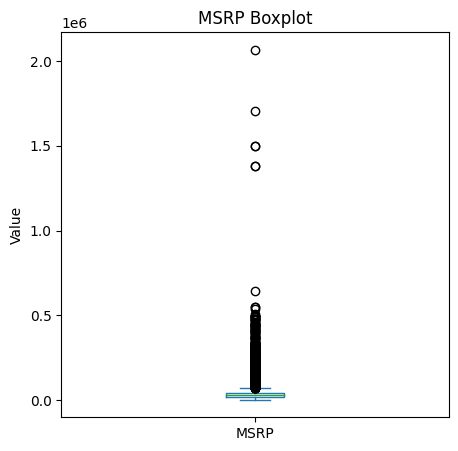

In [ ]:
figure = plt.figure(figsize=(5,5))
car['MSRP'].plot(kind='box')
plt.title('MSRP Boxplot')
plt.ylabel('Value')
plt.show()

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

**Dropping Duplicated Rows**

In [ ]:
car.duplicated().sum()

715

In [ ]:
car.drop_duplicates(inplace=True, keep='last')
car.reset_index(inplace=True, drop=True)

In [ ]:
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


**Dropping Outliers**

In [ ]:
numerical = car.select_dtypes(include=['float64', 'int64']).columns
Quartile1 = car[numerical].quantile(0.25)
Quartile2 = car[numerical].quantile(0.75)
IQR = Quartile2 - Quartile1
IQR

,0
Year,9.0
Engine HP,131.0
Engine Cylinders,2.0
Number of Doors,2.0
highway MPG,8.0
city mpg,6.0
Popularity,1460.0
MSRP,21433.0


In [ ]:
outliers = car[((car[numerical]<(Quartile1 - 1.5 * IQR)) | (car[numerical]>(Quartile2 + 1.5 * IQR))).any(axis=1)]
outliers.index.to_list()
car.drop(index=outliers.index.to_list(), inplace=True)
car.reset_index(inplace=True, drop=True)
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
8638,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
8639,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
8640,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### Split into features and target

In [ ]:
X = car.drop(columns=['MSRP'])
car['MSRP'] = StandardScaler().fit_transform(car[['MSRP']])
y = car['MSRP']

### Feature Engineering

In [ ]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0560
R² Score: 0.9426
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0596
R² Score: 0.9388
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.3190
R² Score: 0.6725
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.1396
R² Score: 0.8567
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.1265
R² Score: 0.8702
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

**Interpretation:**
Out of the 5 models that were run, the best performing models are the Linear Regression, Ridge Regression, Polynomial Regression Models, and Gradient Descent.
- The Linear Regression model explains 94.26% of the variablity in the price of the vechiles and has a relatively low mean squared error value of 0.0560 indicating that the model predictions were close to the actual observed values of the prices of the vehicles.
- The Ridge Regression model explians 93.88% of the variability in the price of the vehicles and has a relatively low mean squared error of 0.0596 indicating that the model predictions were close to the actual observed values of the prices of the vehiles.
- The Polynomial Regression model eplains 87.02% of the variability in the price of the vehicles and has a low mean squared error value of 0.1265 meaning that the model predictions were close to the acutal observed values of the prices of the vehicles.
- The Gradient Descent Model acheived an r-squared value of 85.67% indicating that model was relatively poor when it comes ot the variability of the prices of the vehicles despite having an MSE of 0.1396.

The model that performed worse relative to the models mentioned above were the Lasso Regression Model and the Gradient Descent Model.
- The Lasso Model acheived an r-squared value of 67.25% indicating that model was relatively poor when it comes ot the variability of the prices of the vehicles despite having an MSE of .3190.
  - With Lasso Regression having the goal of driving the model coefficients down to 0 in an attempt to help prevent overfitting, Lasso Regression might not be a good model for this data.




### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.